### Cataract Image Classifier

#### Install Dependencies

In [26]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [27]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [43]:
data = 'dataset'

In [28]:
img = cv2.imread(os.path.join('dataset', 'images', '1.jpg'))

In [29]:
img

array([[[17,  5,  3],
        [16,  4,  2],
        [16,  4,  2],
        ...,
        [17,  6,  2],
        [17,  6,  2],
        [17,  6,  2]],

       [[17,  5,  3],
        [16,  4,  2],
        [16,  4,  2],
        ...,
        [17,  6,  2],
        [17,  6,  2],
        [17,  6,  2]],

       [[17,  5,  3],
        [16,  4,  2],
        [16,  4,  2],
        ...,
        [17,  6,  2],
        [17,  6,  2],
        [17,  6,  2]],

       ...,

       [[12,  3,  0],
        [13,  4,  0],
        [14,  5,  1],
        ...,
        [10,  5,  2],
        [11,  6,  3],
        [11,  6,  3]],

       [[11,  2,  0],
        [13,  4,  0],
        [15,  6,  2],
        ...,
        [10,  5,  2],
        [11,  6,  3],
        [11,  6,  3]],

       [[11,  2,  0],
        [13,  4,  0],
        [15,  6,  2],
        ...,
        [10,  5,  2],
        [11,  6,  3],
        [11,  6,  3]]], dtype=uint8)

In [30]:
img.shape

(1728, 2592, 3)

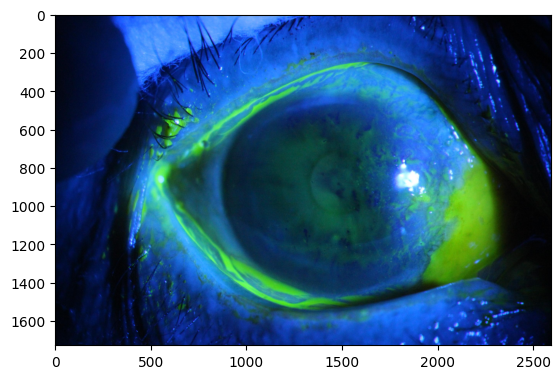

In [31]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [33]:
data = tf.keras.utils.image_dataset_from_directory('dataset')
data_iterator = data.as_numpy_iterator()
batch  = data_iterator.next()

Found 712 files belonging to 1 classes.


In [34]:
batch

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 7.00000000e+00, 1.90000000e+01],
          [2.28906250e+00, 8.68750000e+00, 1.98906250e+01],
          [0.00000000e+00, 7.00000000e+00, 1.70000000e+01]],
 
         [[2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 7.00000000e+00, 2.30000000e+01],
          [1.28906250e+00, 6.79687500e+00, 2.07968750e+01],
          [3.75000000e-01, 5.75000000e+00, 1.97500000e+01]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [0.00000000e+00, 6.86718750e+00, 2.8140

In [36]:
len(batch)

2

In [35]:
batch[0]

array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [1.00000000e+00, 7.00000000e+00, 1.90000000e+01],
         [2.28906250e+00, 8.68750000e+00, 1.98906250e+01],
         [0.00000000e+00, 7.00000000e+00, 1.70000000e+01]],

        [[2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [1.00000000e+00, 7.00000000e+00, 2.30000000e+01],
         [1.28906250e+00, 6.79687500e+00, 2.07968750e+01],
         [3.75000000e-01, 5.75000000e+00, 1.97500000e+01]],

        [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [0.00000000e+00, 6.86718750e+00, 2.81406250e+01],
         [

In [37]:
batch[0].shape

(32, 256, 256, 3)

In [38]:
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

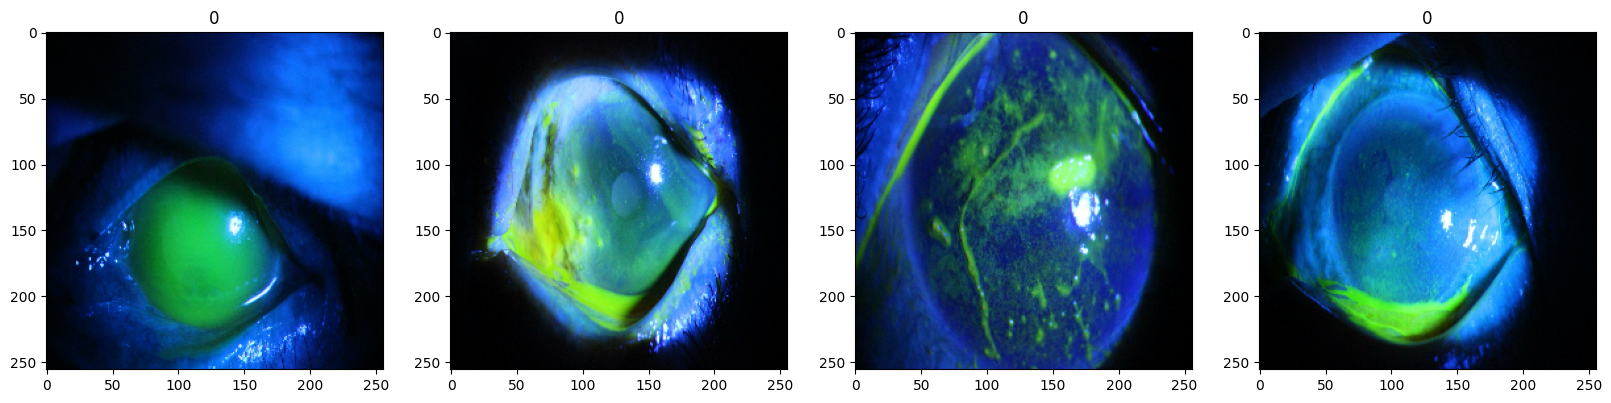

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 10))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype('int'))
    ax[idx].title.set_text(batch[1][idx])

In [40]:
scaled = batch[0] / 255.0

In [41]:
scaled.min()

0.0

In [42]:
scaled.max()

1.0